In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [68]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [94]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Strip spaces from column names
data.columns = data.columns.str.strip()

# Convert string columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
string_columns = data.select_dtypes(include=['object']).columns
for column in string_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Normalize the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [95]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,1.000000,1,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,...,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0,0.933333,1,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,...,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0,0.866667,1,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,...,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0,0.800000,1,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,...,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0,0.733333,1,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,...,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,0.266667,1,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,...,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,192,0.200000,1,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,...,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,192,0.133333,1,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,...,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,192,0.066667,1,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,...,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


In [97]:
X = data.drop('Life expectancy', axis=1)
y = data['Life expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.05404650980357731
Mean Squared Error (MSE): 0.005431697654291262
R² Score: 0.825874630788006


In [77]:
# Load the raw data
raw_file_path = 'Life Expectancy Data.csv'
raw_data = pd.read_csv(raw_file_path)

# Strip spaces from column names
raw_data.columns = raw_data.columns.str.strip()

# Convert string columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
string_columns = raw_data.select_dtypes(include=['object']).columns
for column in string_columns:
    raw_data[column] = label_encoder.fit_transform(raw_data[column])

# Identify numeric columns
numeric_columns = raw_data.select_dtypes(include=['float64', 'int64']).columns

# Handle missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
raw_data[numeric_columns] = imputer.fit_transform(raw_data[numeric_columns])

# Define the features (X) and the target (y)
X_raw = raw_data.drop(columns=['Life expectancy'])
y_raw = raw_data['Life expectancy']

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_raw = LinearRegression()

# Fit the model on the training data
model_raw.fit(X_train_raw, y_train_raw)

# Predict on the testing data
y_pred_raw = model_raw.predict(X_test_raw)

# Calculate the evaluation metrics for raw data
mae_raw = mean_absolute_error(y_test_raw, y_pred_raw)
mse_raw = mean_squared_error(y_test_raw, y_pred_raw)
r2_raw = r2_score(y_test_raw, y_pred_raw)

mae_raw, mse_raw, r2_raw

(2.8482510666482597, 15.085399578283297, 0.8258746307880439)

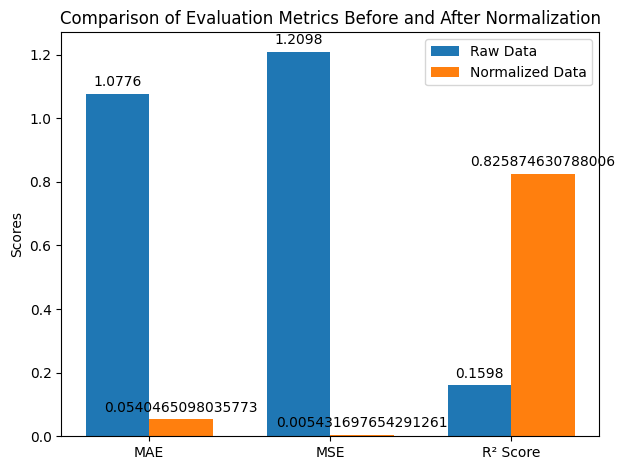

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
metrics = ['MAE', 'MSE', 'R² Score']
raw_data_values = [1.0776, 1.2098, 0.1598]
normalized_data_values = [0.0540465098035773,0.005431697654291261,  0.825874630788006]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, raw_data_values, width, label='Raw Data')
bars2 = ax.bar(x + width/2, normalized_data_values, width, label='Normalized Data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics Before and After Normalization')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in *bars1* and *bars2*, displaying its height.
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


In [83]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Define the cross-validation method with fewer splits
kf_adjusted = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate the evaluation metrics
mae_scores_adjusted = cross_val_score(model, X, y, cv=kf_adjusted, scoring='neg_mean_absolute_error')
mse_scores_adjusted = cross_val_score(model, X, y, cv=kf_adjusted, scoring='neg_mean_squared_error')
r2_scores_adjusted = cross_val_score(model, X, y, cv=kf_adjusted, scoring='r2')

# Calculate the mean of the evaluation metrics
mae_adjusted = -np.mean(mae_scores_adjusted)
mse_adjusted = -np.mean(mse_scores_adjusted)
r2_adjusted = np.mean(r2_scores_adjusted)

mae_adjusted, mse_adjusted, r2_adjusted


(0.05757366082797412, 0.005949127994057754, 0.8162631302111771)

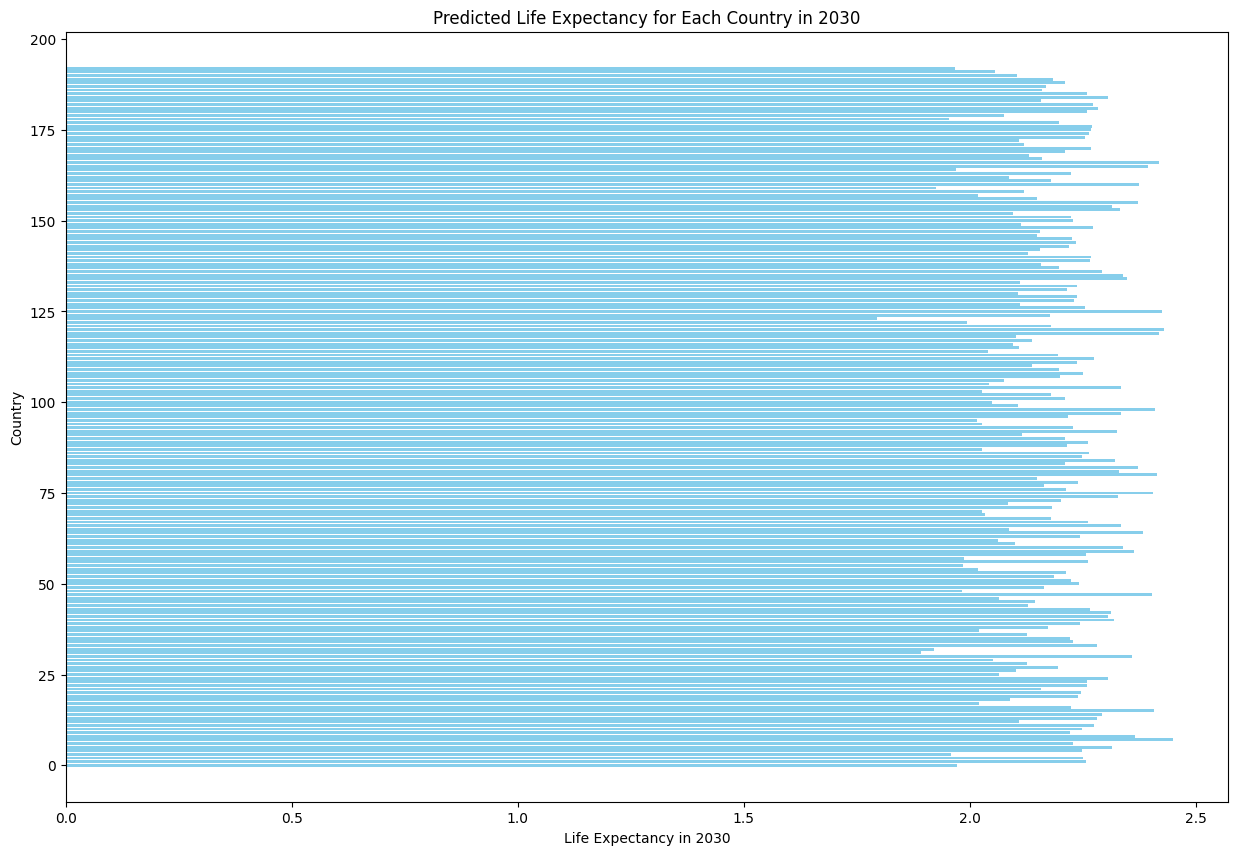

In [98]:
data_2030 = data.copy()
data_2030['Year'] = 2030
X_2030 = data_2030.drop('Life expectancy', axis=1)
y_pred_2030 = model.predict(X_2030)

# Decode the numeric values back to their original string values
data_2030['Life expectancy'] = y_pred_2030
for column in string_columns:
    data_2030[column] = label_encoders[column].inverse_transform(data_2030[column].astype(int))

# Plot the life expectancy predictions for each country
plt.figure(figsize=(15, 10))
countries = data_2030['Country']
life_expectancy_2030 = data_2030['Life expectancy']
plt.barh(countries, life_expectancy_2030, color='skyblue')
plt.xlabel('Life Expectancy in 2030')
plt.ylabel('Country')
plt.title('Predicted Life Expectancy for Each Country in 2030')
plt.show()